# Computer Vision

## Project - Age Verification for Good Seed Supermarket

This project is taked with development of a model for age prediction to be used by the GoodSeed supermarket, in order to verify age in alcohol purchases.

## Initialization

In [1]:

import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam


## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
labels_data = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
labels_data.info()
labels_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


## EDA

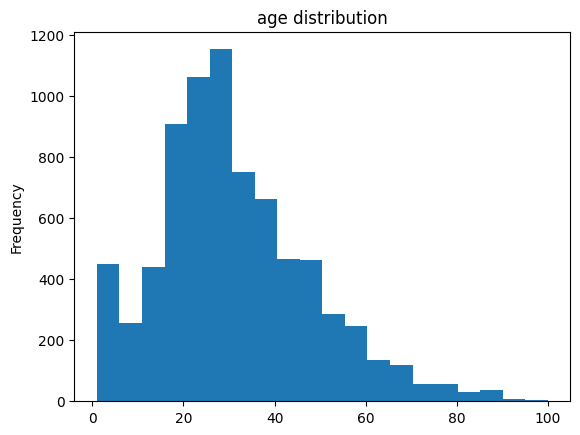

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


In [4]:
labels_data['real_age'].plot(kind='hist', bins=20, title="age distribution")
plt.show()
labels_data.describe()

Age distribution shows most samples are in a range off 20 to 50 years old, this may cause a lack of samples for training in older age groups. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Well done!

</div>


In [5]:
# Create image generator to sample images
datagen = ImageDataGenerator(rescale=(1./255))
datagen_flow = datagen.flow_from_dataframe(labels_data,
                                           directory='/datasets/faces/final_files/',
                                           x_col='file_name',
                                           y_col='real_age',
                                           target_size=(150, 150),
                                           batch_size=10,
                                           class_mode='raw',
                                           seed=12345)

features, target = next(datagen_flow)
print(features.shape)

Found 7591 validated image filenames.
(10, 150, 150, 3)


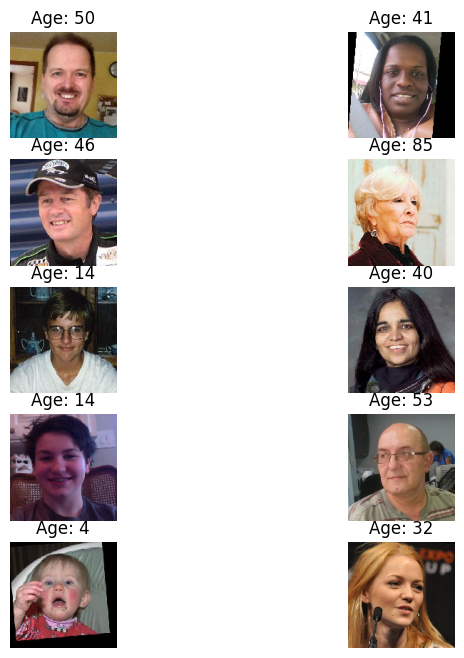

In [6]:
plt.figure(figsize=(8, 8))
for i in range(len(features)):
    plt.subplot(5, 2, i + 1)
    plt.imshow(features[i])
    plt.title(f"Age: {target[i]}")
    plt.axis('off')

plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nice work with the image sampling!

</div>


### Findings

Files show age in ranges from 1 to 100 years in subjects with an avewrage age of 31. This age range within the provided 7.6k photos should provide sound data for training an a age identidication network, as the majority of samples are withing the target age for the purposes 21 years or over predictions. Images display some tilting leading tranformed photos with black areas, training should accomodate for this.

## Modelling

Training will be conducted using a pretrained ResNet50 model with weights from Imagenet.

In [7]:
def load_train(path):
    
    labels_data = pd.read_csv(path + '/datasets/faces/labels.csv')

    datagen = ImageDataGenerator(validation_split=0.25, rescale=(1./255))

    training_gen_flow = datagen.flow_from_dataframe(labels_data,
                                                directory=path + '/datasets/faces/final_files/',
                                                x_col='file_name',
                                                y_col='real_age',
                                                target_size=(150, 150),
                                                batch_size=16,
                                                class_mode='raw',
                                                subset='training',
                                                seed=12345)

    return train_gen_flow

In [8]:
def load_test(path):

    labels_data = pd.read_csv(path + '/datasets/faces/labels.csv')

    datagen = ImageDataGenerator(validation_split=0.25, rescale=(1./255))

    test_gen_flow = datagen.flow_from_dataframe(labels_data,
                                                directory=path + '/datasets/faces/final_files/',
                                                x_col='file_name',
                                                y_col='real_age',
                                                target_size=(150, 150),
                                                batch_size=16,
                                                class_mode='raw',
                                                subset='validation',
                                                seed=12345)

    return test_gen_flow

In [10]:

def create_model(input_shape):
    
    backbone = ResNet50(weights='imagenet',
                       input_shape=input_shape,
                       include_top=False)

    model.Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


In [11]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_gen_flow)

    if steps_per_epoch is None:
        steps_per_epoch = len(test_gen_flow)

    model.fit(train_gen_flow,
             validation_data=test_gen_flow,
             batch_size=batch_size, epochs=epochs,
             steps_per_epoch=steps_per_epoch,
             validation_steps=validation_steps,
             verbose=2)
    
    return model

## Prepare the Script to Run GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [16]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921

Epoch 2/20
356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035

Epoch 3/20
356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454

Epoch 4/20
356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481

Epoch 5/20
356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192

Epoch 6/20
356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332

Epoch 7/20
356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359

Epoch 8/20
356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239

Epoch 9/20
356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529

Epoch 10/20
356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629

Epoch 11/20
356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866

Epoch 12/20
356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591

Epoch 13/20
356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467

Epoch 14/20
356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401

Epoch 15/20
356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841

Epoch 16/20
356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304

Epoch 17/20
356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419

Epoch 18/20
356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226

Epoch 19/20
356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908

Epoch 20/20
356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512

## Conclusions

Training shows a functioning model to predict age groups that can be used for age verification in store purchases. The model however requires modifications for improvment as lowest obtained MAE sits at 3 for training set and 7 for validation set. This task in particular is better framed around the legal age for alcohol purchase 18+/21+ instead of trying to find a global minimum. 